#Importing Dataset 


In [199]:
import pandas as pd
data = pd.read_csv('stroke-balanced.csv')
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,44912,Male,12.0,0,0,No,children,Urban,67.06,16.1,Unknown,0
1,66972,Female,52.0,0,0,Yes,Govt_job,Urban,80.88,23.8,smokes,0
2,1451,Female,17.0,0,0,No,Private,Urban,78.46,23.5,Unknown,0
3,49797,Female,28.0,0,0,No,Private,Rural,75.53,34.9,never smoked,0
4,70241,Female,22.0,0,0,No,Private,Urban,66.29,20.5,smokes,0


In [200]:
data['stroke'].value_counts()


0    498
1    498
Name: stroke, dtype: int64

#Data Preprocessing 


## Handling missing values (i)

In [201]:
# TODO: create a mask of rows with missing data
mask = data.isnull().any(axis=1)

# TODO: calculate number of rows with missing data
nan_rows = mask.sum()

#we should calculate number of total rows to get ratio
total_rows = len(data)

# TODO: print the ratio of rows with missing data
print(nan_rows, total_rows)
print(nan_rows / total_rows * 100, '%')


88 996
8.835341365461847 %


In [202]:
# TODO: remove rows with missing data
clean_data = data[~mask]
# TODO: make sure of removing rows with missing data
clean_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,44912,Male,12.0,0,0,No,children,Urban,67.06,16.1,Unknown,0
1,66972,Female,52.0,0,0,Yes,Govt_job,Urban,80.88,23.8,smokes,0
2,1451,Female,17.0,0,0,No,Private,Urban,78.46,23.5,Unknown,0
3,49797,Female,28.0,0,0,No,Private,Rural,75.53,34.9,never smoked,0
4,70241,Female,22.0,0,0,No,Private,Urban,66.29,20.5,smokes,0


##Input and output (ii)




In [203]:
# TODO: Select all columns from `data_clean` except `id` and `stroke`
input_data = clean_data.drop(columns=['id', 'stroke'])

# TODO: Select `stroke` column from `data_clean`
output_data = clean_data['stroke']
input_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,12.0,0,0,No,children,Urban,67.06,16.1,Unknown
1,Female,52.0,0,0,Yes,Govt_job,Urban,80.88,23.8,smokes
2,Female,17.0,0,0,No,Private,Urban,78.46,23.5,Unknown
3,Female,28.0,0,0,No,Private,Rural,75.53,34.9,never smoked
4,Female,22.0,0,0,No,Private,Urban,66.29,20.5,smokes


##Handling categorical data (iii)
### Numeric encoding (i)

In [204]:
# TODO: print data types of `data_input`
input_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [205]:
#print unique values of categorical features
print('Gender: ', input_data['gender'].unique())
print('Ever_married: ', input_data['ever_married'].unique())
print('Work_type: ', input_data['work_type'].unique())
print('Residence_type: ', input_data['Residence_type'].unique())
print('Smoking_status: ', input_data['smoking_status'].unique())


Gender:  ['Male' 'Female']
Ever_married:  ['No' 'Yes']
Work_type:  ['children' 'Govt_job' 'Private' 'Self-employed' 'Never_worked']
Residence_type:  ['Urban' 'Rural']
Smoking_status:  ['Unknown' 'smokes' 'never smoked' 'formerly smoked']


In [206]:
# TODO: Encode  `gender`, `ever_married`, and `Residence_type` using numeric encoding
encoded_data = input_data.replace({
    'gender':{'Male':0,'Female':1},
    'ever_married':{'No':0,'Yes':1},
    'Residence_type':{'Urban':0,'Rural':1}
})


In [207]:
encoded_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,12.0,0,0,0,children,0,67.06,16.1,Unknown
1,1,52.0,0,0,1,Govt_job,0,80.88,23.8,smokes
2,1,17.0,0,0,0,Private,0,78.46,23.5,Unknown
3,1,28.0,0,0,0,Private,1,75.53,34.9,never smoked
4,1,22.0,0,0,0,Private,0,66.29,20.5,smokes


**Note:** `data_input_encoded_1` must have numeric values for `gender`, `ever_married`, and `Residence_type`

### One-hot encoding (ii)

In [208]:
#apply one-hot encoding to data_input_encoded_1
encoded_data = pd.get_dummies(encoded_data, prefix='is')

In [209]:
encoded_data.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,is_Govt_job,is_Never_worked,is_Private,is_Self-employed,is_children,is_Unknown,is_formerly smoked,is_never smoked,is_smokes
0,0,12.0,0,0,0,0,67.06,16.1,0,0,0,0,1,1,0,0,0
1,1,52.0,0,0,1,0,80.88,23.8,1,0,0,0,0,0,0,0,1
2,1,17.0,0,0,0,0,78.46,23.5,0,0,1,0,0,1,0,0,0
3,1,28.0,0,0,0,1,75.53,34.9,0,0,1,0,0,0,0,1,0
4,1,22.0,0,0,0,0,66.29,20.5,0,0,1,0,0,0,0,0,1


# Split into (train - validation - test)

In [210]:
from sklearn.model_selection import train_test_split

# TODO: split (data_input_encoded_2, data_output)
X, X_test, y, y_test = train_test_split(encoded_data, output_data, test_size=0.20, random_state=0)
    
# TODO: split (X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)
y_test.loc[y_test==1].sum()

86

In [211]:
print(X_train.shape)
print(y_train.shape)
print('---------------------')
print(X_val.shape)
print(y_val.shape)
print('---------------------')
print(X_test.shape)
print(y_test.shape)

(544, 17)
(544,)
---------------------
(182, 17)
(182,)
---------------------
(182, 17)
(182,)


# Feature scaling (Normalization)

In [212]:
from sklearn.preprocessing import MinMaxScaler

# TODO: create an object of `MinMaxScaler`
scaler = MinMaxScaler()

# TODO: fit the `scaler` using `X_train`
scaler.fit(X_train)

# TODO: transform `X_train`, 'X_val', and 'X_test' using the `scaler`
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


#function: Evaluate Each Classifier

In [213]:
from sklearn.metrics import accuracy_score

# TODO: create a function to handle applying the model and generating the accuracy

def eval_classifier(clf, X_train, y_train, X_val, y_val):
 clf.fit(X_train, y_train)
 y_pred_train = clf.predict(X_train)
 y_pred_val = clf.predict(X_val)
 acc_train = accuracy_score(y_train, y_pred_train).round(6) * 100
 acc_val = accuracy_score(y_val, y_pred_val).round(6) *100
 print(clf.__class__.__name__)
 print('acc train:', acc_train, '%')
 print('acc val:', acc_val, '%')
 print('----------------------------')
 return acc_train, acc_val


#Model Selection 


In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [215]:
# TODO: select the modles and hyper parameters

tree_clf = DecisionTreeClassifier(random_state=1,max_depth=7)
logistic_clf = LogisticRegression(random_state=1)
random_forest=RandomForestClassifier(random_state=1,n_estimators=200, max_depth=7)
svc_clf = SVC(probability=True,random_state=1, C=1)
estimators = [
('Decision Tree', tree_clf),
('Logistic Regression', logistic_clf),
('SVC', svc_clf),
('Random Forest',random_forest),
]
H_voting_clf = VotingClassifier(estimators)
S_voting_clf = VotingClassifier(estimators,voting='soft')


In [216]:
# TODO: call the functions using the selected models

all_estimators = estimators + [('Hard Voting',H_voting_clf)] + [('Soft Voting',S_voting_clf)] 

results = {
'model': [],
'acc train': [],
'acc val': []
}
for (name, clf) in all_estimators:
  if name == 'Hard Voting':
    print('Hard voting')
  if name == 'Soft Voting': print('Soft voting')
  acc_train, acc_val = eval_classifier(clf, X_train_scaled, y_train, X_val_scaled, y_val)
  results['model'].append(name)
  results['acc train'].append(acc_train)
  results['acc val'].append(acc_val)



DecisionTreeClassifier
acc train: 89.7059 %
acc val: 79.67030000000001 %
----------------------------
LogisticRegression
acc train: 78.4926 %
acc val: 79.1209 %
----------------------------
SVC
acc train: 80.14710000000001 %
acc val: 78.5714 %
----------------------------
RandomForestClassifier
acc train: 90.625 %
acc val: 81.8681 %
----------------------------
Hard voting
VotingClassifier
acc train: 86.2132 %
acc val: 81.31869999999999 %
----------------------------
Soft voting
VotingClassifier
acc train: 87.6838 %
acc val: 78.5714 %
----------------------------


In [217]:
final_results ={
'model': [],
'acc train': [],
'acc val': []
}
final_results['model'] = results['model']
final_results['acc train'] = results['acc train'] 
final_results['acc val'] = results['acc val']

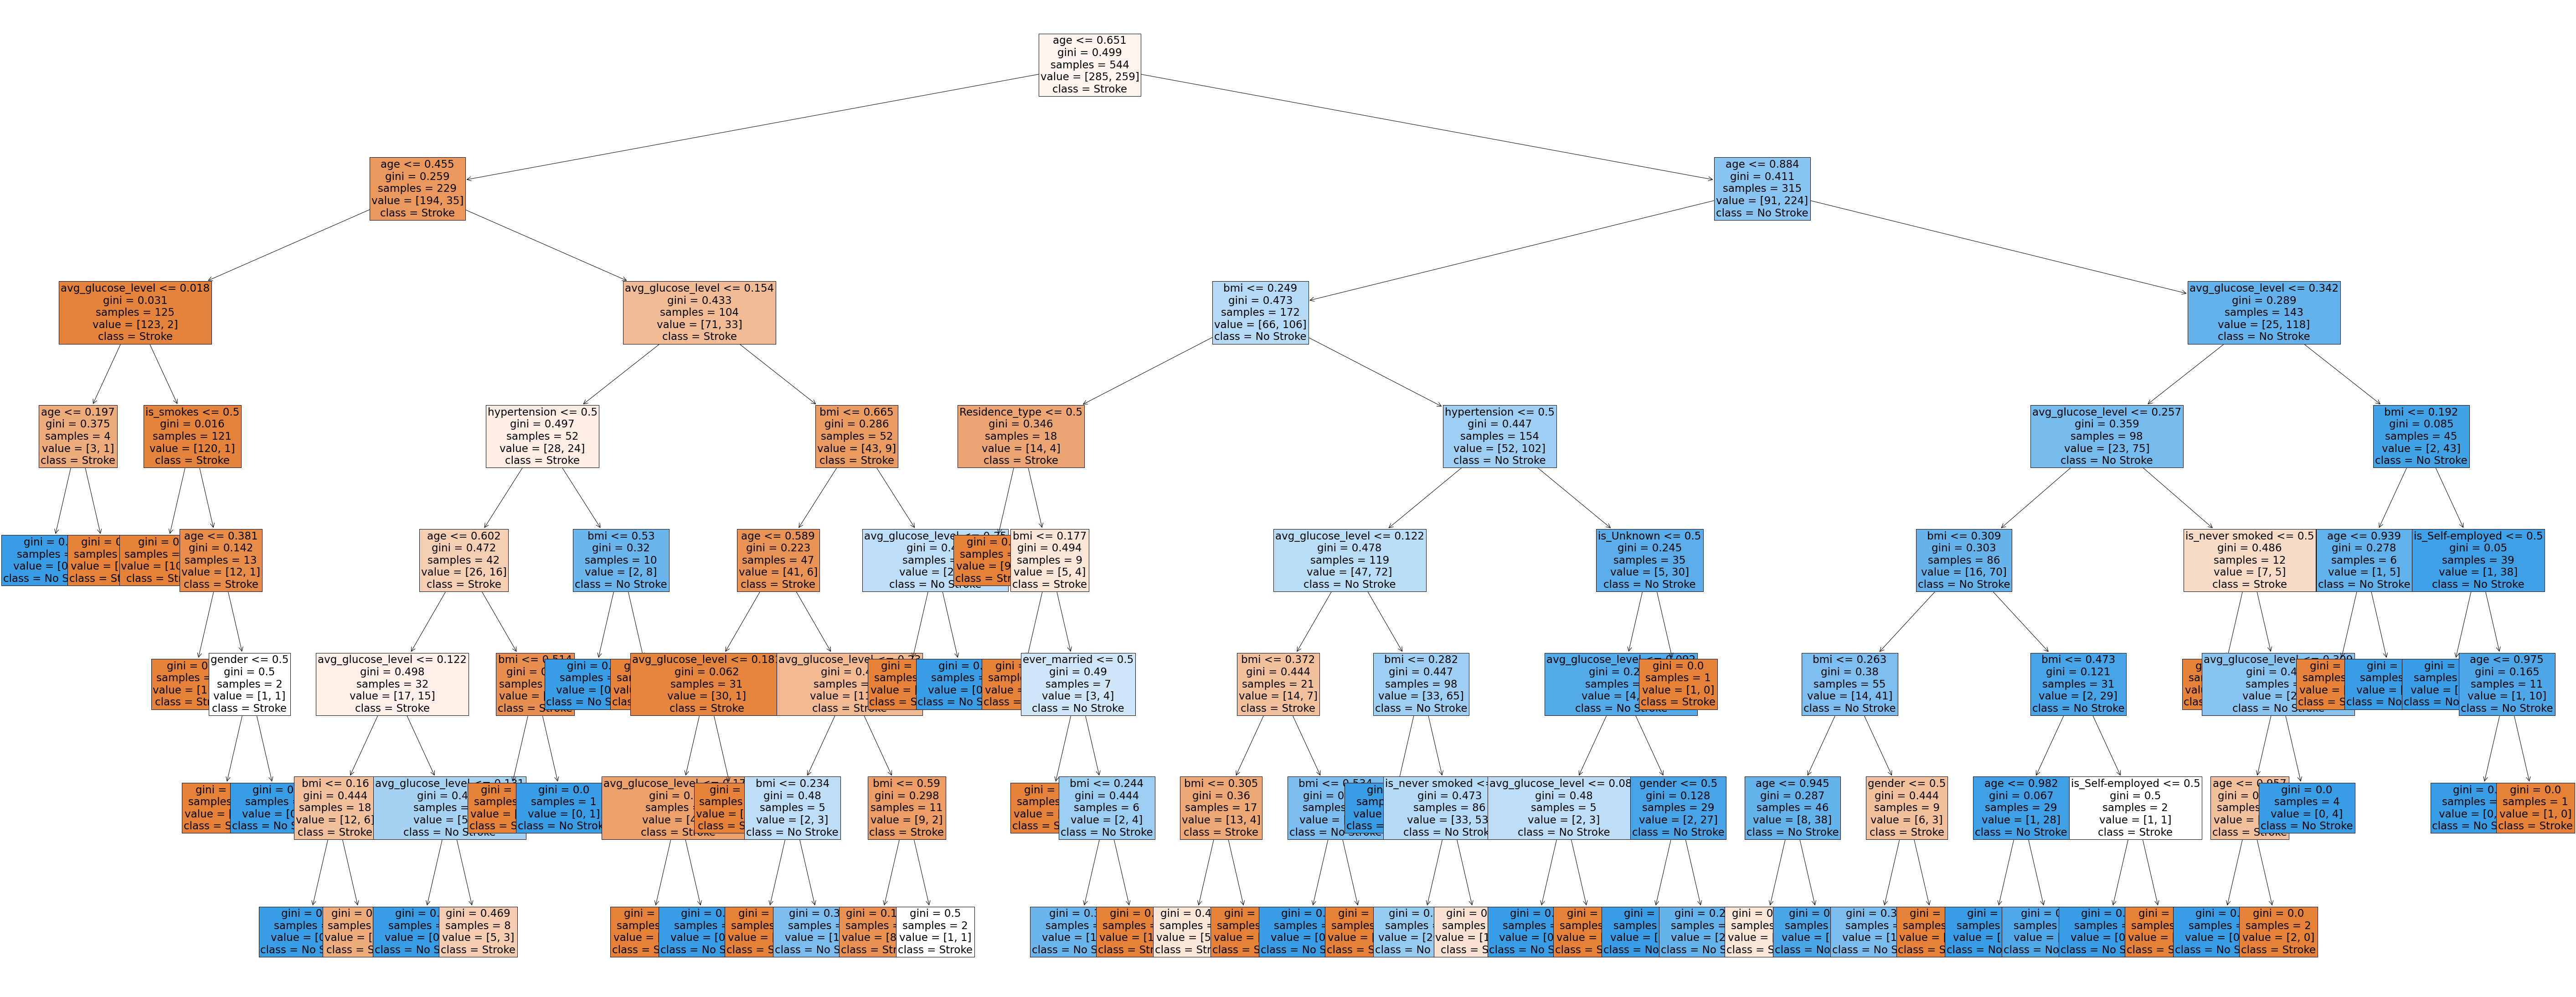

In [218]:
# TODO: visualize the decision tree

from sklearn import tree
import matplotlib.pyplot as plt


feature_names = [
    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'is_Govt_job', 'is_Never_worked', 'is_Private', 'is_Self-employed', 'is_children', 'is_Unknown', 'is_formerly smoked', 'is_never smoked', 'is_smokes']
plt.figure(figsize=(100, 40))
tree.plot_tree(tree_clf,
               feature_names=feature_names,
               class_names=['Stroke', 'No Stroke'],
               filled=True,
               fontsize=23,
               )
plt.show()


<BarContainer object of 17 artists>

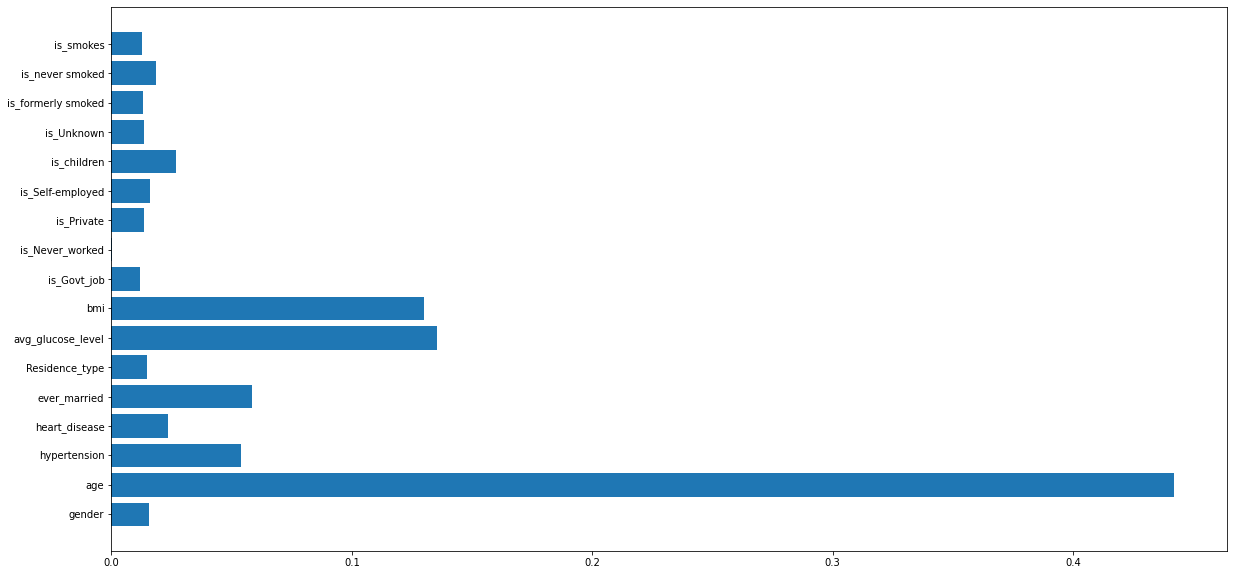

In [219]:
# TODO: visualize the important features according to random forstes
plt.figure(figsize=(20, 10))
plt.barh(feature_names, random_forest.feature_importances_)


#Comparing results

In [220]:
# TODO: compare between the accurary of different models
final_results_df = pd.DataFrame(final_results)

final_results_df.sort_values(by='acc val', ascending=False, ignore_index=True, inplace=True)
final_results_df

,model,acc train,acc val
0,Random Forest,90.6250,81.8681
1,Hard Voting,86.2132,81.3187
2,Decision Tree,89.7059,79.6703
3,Logistic Regression,78.4926,79.1209
4,SVC,80.1471,78.5714
5,Soft Voting,87.6838,78.5714


#Models Visualization 

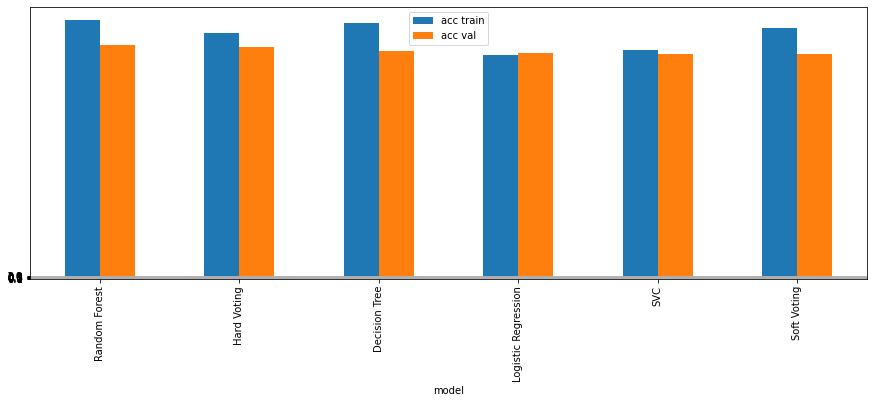

In [221]:
# TODO: visualize the comparison 

import numpy as np
final_results_df.plot.bar(x='model', y=['acc train', 'acc val'], figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

#Testing

In [222]:
# TODO: apply the best model on the testing set
import sklearn.metrics as metrics
y_pred_test = random_forest.predict(X_test_scaled)

# TODO: print the other evaluation metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test).round(6) * 100)
print("Precision:", metrics.precision_score(
    y_test, y_pred_test).round(6) * 100)
print("Recall:", metrics.recall_score(y_test, y_pred_test).round(6) * 100)


Accuracy: 79.1209
Precision: 72.64150000000001
Recall: 89.5349


In [223]:
# TODO: print the convolution matix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[67, 29],
       [ 9, 77]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

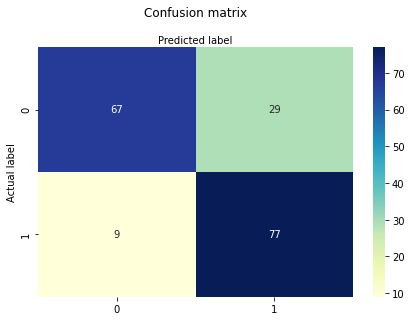

In [224]:
# TODO: visualize the confustion matrix
import seaborn as sns

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

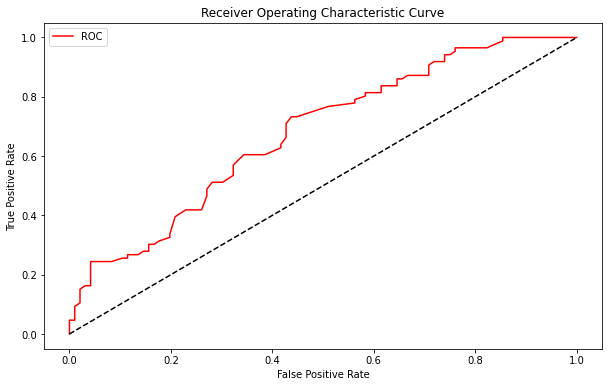

In [225]:
from sklearn.metrics import roc_curve

#predict probabilities
probs = random_forest.predict_proba(X_test)

#Keeping only positive class
probs = probs[:, 1]

#Calculating the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plotting the figure
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()
